<h1><center>Laboratorio 2: El Pandas no muerde 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolás Acevedo   
- Nombre de alumno 2: Pablo Ubilla


### **Link de repositorio de GitHub:** `https://github.com/nicacevedo/Laboratorio-Ciencia-de-Datos/tree/main/Lab2`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Manejo de DataFrames con la libreria `pandas`.
- Visualizaciones interactivas de los datos con `plotly`.

## Reglas:

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material y segmentos de código del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar el **Análisis Exploratorio de Datos** a un caso en particular.


El laboratorio deberá ser desarrollado **sin el uso indiscriminado de nativos de python** (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [2]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para visualizar
# !pip3 install --upgrade plotly
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán realizar un Análisis Exploratorio de datos sobre el conjunto ```students_grades.csv```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [3]:
# Usar solamente si utilizan Collab.
# from google.colab import drive
# drive.mount("/content/drive")
dir = './Dataset_lab2/'

In [4]:
df_grades = pd.read_csv(dir+'students_grades.csv')
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


## 1.1 Revisión de datos [1 punto]

<p align="center">
  <img src="https://media2.giphy.com/media/4FQMuOKR6zQRO/giphy.gif?cid=ecf05e47ii9lhu9tc9tb31d6lafrysp2zyf6u8w3y348mk8t&rid=giphy.gif&ct=g">
</p>



El Rector *Don Caguayo* le comenta que actualmente la Universidad posee un total de **1000** alumnos inscritos. Sin embargo, al revisar su *Excel*, no le cabe en la cabeza que hayan más de **1000** alumnos en la universidad. 

Consternado, el rector cree que se han realizado malas prácticas al inscribir tanto los registros de las notas como las notas como tal y les solicita a ustedes (aka, los expertos) que revisen los datos. 

Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**.

Cree una función que le permita revisar si las diferentes variables que componen el dataset son coherentes y si es posible observar anomalías en estas.

> ¿Sera necesario limpiar los datos?, comente esto en la celda ubicada debajo de **justificación**. (agregar si están bien el rango de notas)

**To-Do**

Crear la función que `analisis_exploratorio` que:
- [X] Imprima un extracto del Dataframe (usar `display` en vez de `print` para los DataFrames).
- [X] Imprima las dimensiones del DataFrame.
- [X] Describa los datos numéricos a través de ```.describe()```.
- [X] Imprima el total de filas repetidas (hint: Buscar el método ```duplicated()```.).
- [X] Imprima la cantidad de valores nulos (`ìsna()`).
- [X] Imprima la cantidad de valores unicos.

Además, genere visualizaciones (fuera de la función) que:
- [X] Muestre la distribución de las variables numericas.

Por último, 

- [X] Justifique si será necesario limpiar los datos y aplique los análisis univariado y/o bivariado vistos en clase.


In [5]:
def analisis_preliminar_datos(df_grades):
  #### Codigo Aquí ####
  print('Extracto del DataFrame:')
  display(df_grades.head())

  print('-'*50)
  print(f'\nDimensiones del DataFrame: {df_grades.shape}')

  print('-'*50)
  print('\nEstadísticas Basicas:')
  display(df_grades.describe())

  print('-'*50)
  print(f'\nFilas Duplicadas: {df_grades.duplicated().sum()}')

  print('-'*50)
  print('\nValores Nulos por Columna:\n')
  print(df_grades.isna().sum())

  print('-'*50)
  print(f'\nTotal de Valores Nulos: {df_grades.isna().sum().sum()}')

  print('-'*50)
  print('\nValores Unicos por Columna:\n')
  unqs = pd.Series(index=df_grades.columns, dtype=int)
  for col in df_grades.columns:
    unqs[col] = len(df_grades[col].unique())
  print(unqs)

  print('-'*50)
  print(f'\nValores Unicos Totales: {unqs.sum()}')


analisis_preliminar_datos(df_grades)

Extracto del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


--------------------------------------------------

Dimensiones del DataFrame: (1400, 9)
--------------------------------------------------

Estadísticas Basicas:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000


--------------------------------------------------

Filas Duplicadas: 3
--------------------------------------------------

Valores Nulos por Columna:

names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64
--------------------------------------------------

Total de Valores Nulos: 127
--------------------------------------------------

Valores Unicos por Columna:

names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       97
reading score                    89
writing score                    93
dtype: int32
-------------------------------

> Utilice alguna visualización (gráfique) para observar el comportamiento de los datos numericos. ¿Estan todos los valores correctos?

In [6]:

def distribuciones(df_grades):

    # Columnas numéricas
    df_numerico = df_grades.loc[:,df_grades.dtypes != object]

    # Distribuciones (Histogramas)
    px.histogram(
        df_numerico,
        width=800, 
        height=500
        ).show()

    # Violin
    
    px.violin(
        df_numerico,
        box=True,
        points='all',
        width=800, 
        height=500
        ).show()


distribuciones(df_grades)

In [28]:
# Distribuciones (Histogramas)

def distribuciones_cat(df_grades):

    # Columnas numéricas
    df_clases = df_grades.loc[:,df_grades.dtypes == object]
    df_clases.drop("names",axis=1,inplace=True)

    # Distribuciones (Histogramas)
    px.histogram(
        df_clases,
        width=800, 
        height=500
        ).show()

distribuciones_cat(df_grades)

In [29]:
# Análisis Bivariado
df_grades.corr()

,math score,reading score,writing score,GPA
math score,1.000000,0.817580,0.802642,0.919475
reading score,0.817580,1.000000,0.954598,0.970664
writing score,0.802642,0.954598,1.000000,0.966150
GPA,0.919475,0.970664,0.966150,1.000000


**Justificación:**


Efectivamente es necesario llevar a cabo una limpieza en los datos por varias razones:

1. Existen 3 filas duplicadas. Es decir, tenemos exactamtente la misma observación 3 veces, por lo que el primer filtro debería ser eliminar estos duplicados.

2. Si vemos tanto las estadísticas básicas como la visualización anterior, claramente existen observaciones con puntajes superiores a la escala que se definió (0 a 100), por lo que los puntajes superiores a este corte no deberían ser considerados, por ser out of range. Todas estas están por encima de 100 (no existen valores por debajo de 0).

3. Vemos que también tenemos muchos datos faltantes en los puntajes. Si alguien tiene valores faltantes en los tres putajes, entonces no tiene sentido que esta observación se mantenga en la base.

4. Si asumimos que el atributo $names$ es una llave primaria (identificador único), entonces podemos eliminar los duplicados de esta llave, ya que nos dicen que cada alumno solo puede tener un registro de su nota.

5. Para este caso se realiza un análisis univariados donde vemos la distribución tanto de los atributos numéricos como categóricos. Al no existir una variable de interés, nos concentramos en que todos los atributos estudiados poseen un nivel de variación en sus valores, donde no consideramos necesario eliminar alguna columna hasta ahora.

6. Optamos por realizar el análisis multivariado asociado a la correlación de las variables numéricas. Se ve una clara correlación entre los puntajes de todas las pruebas y el GPA, lo que es relativamente esperable (puede haber una variable no observable relacionada a la intelegencia o el estudio). De todas formas, decidimos dejar todas estos atributos, pues nos serán útiles para los pedidos que podría realizar *Don Caguayo*.


## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://media3.giphy.com/media/c09yGbnSyaFRS/giphy.gif?cid=ecf05e47d0ejjjnpfj0ywcbwz7zk7sw2rfdpis890gmdpvj2&rid=giphy.gif&ct=g">
</p>


En base a lo realizado anteriormente, tome la decisión (si es necesario) de limpiar el dataset. Asuma los supuestos que estime conveniente para limpiar el DataFrame y cree una función que le permita limpiar los datos, si estima que no es necesario realizar esto, omita esta parte.

**To-Do:**

- [X] Decidir si realizar o no la limpieza.
- [X] Crear función que nos permita limpiar el dataset.
- [ ] Justifique las asunciones realizadas para limpiar los datos.

**Hint**

En el caso que decida limpiar el dataset, puede que le sean de utilidad las funciones ```.drop_duplicates()``` y ```.dropna()```.


In [8]:
#### Codigo Aquí ####
def limpieza_de_datos(df_grades):
    # Copia por seguridad
    df = df_grades.copy()

    # 1. Eliminar filas duplicadas
    df = df[~df.duplicated()]

    # 2.1. Puntajes out of range en las 3 pruebas se van
    df = df[(df['math score'] <= 100 ) | (df['reading score'] <= 100 ) | (df['writing score'] <= 100)] 

    # 2.2. Puntajes out of range en alguna de las 3 pueden ser reemplazados por NA's
    for score in ['math score', 'reading score', 'writing score']:
        # to nan
        df.loc[df[score] > 100,score] = np.nan
    # display(df[df['writing score'].isna()])

    # 3. NA's en los 3 putajes no tienen sentido de ser
    df = df[~((df['math score'].isna() ) & (df['reading score'].isna()) & (df['writing score'].isna())) ]
    # (al final no había de estos xd)

    # 4. Nombre duplicados
    nombres_duplicados = df.loc[df['names'].duplicated(), 'names']
    # print(nombres_duplicados)
    # display(df[df['names'].isin(nombres_duplicados)].shape)
    # display(df[ (df['names'].isin(nombres_duplicados)) & ((df['math score'].isna() ) | (df['reading score'].isna()) | (df['writing score'].isna())) ].shape)

    df2 = df.copy()
    # Si el nombre está duplicado y tiene NA's, se va
    df2 = df2[~((df['names'].isin(nombres_duplicados)) & ((df['math score'].isna() ) | (df['reading score'].isna()) | (df['writing score'].isna())))]
    # funcionó xd
    display(df2.loc[df2['names'].duplicated(), 'names'])

    return df2
df_grades = limpieza_de_datos(df_grades)

Series([], Name: names, dtype: object)

> Utilice la función creada en el punto 1.1 para verificar sus resultados.

In [9]:
# Analisis preliminar
analisis_preliminar_datos(df_grades)

# Distribuciones
distribuciones(df_grades)

Extracto del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


--------------------------------------------------

Dimensiones del DataFrame: (1016, 9)
--------------------------------------------------

Estadísticas Basicas:


,math score,reading score,writing score
count,1004.000000,1006.000000,1006.000000
mean,66.022908,69.217694,67.935388
std,15.199716,14.644012,15.256507
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.750000,79.000000
max,100.000000,100.000000,100.000000


--------------------------------------------------

Filas Duplicadas: 0
--------------------------------------------------

Valores Nulos por Columna:

names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     12
reading score                  10
writing score                  10
dtype: int64
--------------------------------------------------

Total de Valores Nulos: 32
--------------------------------------------------

Valores Unicos por Columna:

names                          1016
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       82
reading score                    73
writing score                    78
dtype: int32
--------------------------------

**Justificación:**

```
Escriba aquí su justificación
```

La limpieza de datos se centra principalmente en los pedidos realizados por *Don Caguayo*. Sabemos que los registros deben ser uno por alumno, y que las notas van en un rango de 0 a 100. Debido a esto se realizan los siguientes análisis:

1. Vemos si existen registros duplicados. Si todos los atributos coinciden en 2 filas entonces no tiene sentido guardar la información en 2 (o más) filas, en este caso optamos por dejar solo uno de estos registros.

2. Estudiamos las anomalías que se pueden presentar en las notas de los alumnos. Tomamos el supuesto de que no aporta información una nota fuera de rango (menor a 0 o mayor a 100), donde se opta por marcarlas como datos faltantes, ya que a priori no podemos saber cuál sería la nota verdadera del alumno sin más información del contexto.

3. Revisamos si en los registros que no presentan anomalías de rango, existen datos faltantes de algún tipo (lo que no fue el caso).

4. Finalmente, estudiamos si hay nombres duplicados, ya que sabemos que es solo un registro por alumno. Para decidir que registro utilizar en los casos duplicados, se revisa si alguno de estos tiene datos faltantes (marcados anteriormente, y asociados a datos fuera de rango), en cuyo caso decidimos dejar únicamente el registro que cumple con tener toda la información sin anomalías.

## 1.3 Análisis exploratorio de datos



<p align="center">
  <img src="https://media4.giphy.com/media/ko7twHhomhk8E/giphy.gif?cid=ecf05e47xmgfz8ftaom8saa4cwktxpb0fkui9yk3nakb4ff1&rid=giphy.gif&ct=g">
</p>


### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 punto]

En la ultima reunion con Don Caguayo este les comenta es complejo para el y su equipo entender la graduación de notas de 0 a 100. Por ende, le comenta que desde hace harto tiempo tienen la intención de *trnasformar* todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree un función que le permita pasar a la escala Chilena las notas que se escapan del rango [1,7]. 

(No ocupe ningún tipo de ciclo).

**To-Do**

- [X] Tranforme los valores a la escala chilena.
- [X] Asigne los valores transformados al DataFrame.

In [10]:
#### Codigo Aquí ####

def porcentaje_a_chilena(df_grades):
    df = df_grades.copy()
    df[['math score', 'reading score', 'writing score']] = df[['math score', 'reading score', 'writing score']]*0.06+1
    return df

# Test
porcentaje_a_chilena(df_grades).head(20)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
8,Jonathan Clingan,male,group D,some college,standard,completed,5.26,4.66,5.14
9,William Tang,male,group D,associate's degree,standard,none,5.50,5.08,4.84
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46
15,Gerald Wilson,male,group A,associate's degree,standard,none,4.78,4.66,4.66
16,Damon Mckee,male,group E,high school,standard,none,6.64,5.38,5.26


In [11]:
# Asignamos 
df_grades = porcentaje_a_chilena(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22


### 1.3.2 Obtención de promedio de alumnos [0.5 puntos]

Con todas las notas adjuntadas, la prestigiosa *Universidad De la Cachaña* necesita obtener el promedio general de cada uno de los alumnos (Grade Point Average - GPA). Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del DataFrame original.

**To-Do:**
- [X] Obtenga el promedio de cada uno de los alumnos.
- [X] Anexe esta información en el DataFrame original.


In [12]:
#### Codigo Aquí ####
def agregar_promedio(df_grades):
    df = df_grades.copy()
    df['GPA'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
    return df

# Test
agregar_promedio(df_grades).head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [13]:
# Agregamos
df_grades = agregar_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados [1 punto]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena.

Cree una función que permita obtener dos Dataframes, el primero debe poseer solamente los alumnos que han reprobado en la prestigiosa universidad y el segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.

**To-Do:**

- [X] Obtenga una máscara DataFrame con los alumnos que reprobaron el año.
- [X] Reemplaze todos los GPA reprobados con una **R**.

In [14]:
#### Codigo Aquí ####

def reprobados(df_grades):
    df = df_grades.copy()
    df1 = df[df['GPA'] < 4].copy()
    df.loc[df['GPA'] < 4, 'GPA'] = 'R'
    return df1, df

# Test
df_reprobados, df_completo = reprobados(df_grades)
display(df_reprobados.head())
df_completo.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
55,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
63,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [15]:
# Reemplazo con R
# df_grades = df_completo
# df_grades.head()

### 1.3.4 Información por Categorías [1 punto]

Motivado por saber más sobre los datos, el Rector les solicita que genere una función que le permita comparar los promedios de diferentes **atributos categóricos** del DataFrame. Para esto su función deberá tener como entrada el DataFrame con todos los promedios (sin agregar las R's) y calcular el promedio **agrupando por etnias y el nivel educacional de los padres**.

**To-Do:**

- [X] Hacer una función que nos permita obtener la comparación de promedios para dos atributos categóricos.
- [X] Cada uno de los grupos expuestos deben exponer el porcentaje de alumnos que representan en el colegio.
- [X] Comente lo que observa de los resultados.
- [X] Visualice los datos generados con [`px.sunburst`](https://plotly.com/python/sunburst-charts/ ).


In [16]:
#### Codigo Aquí ####




def comparacion_de_promedios(df_grades, atr1, atr2):
    # Copias y percentage vacío
    df = df_grades.copy()
    df['percentage %'] = 0

    # DataFrames a agrupar
    df1 = df[[atr1, atr2, 'math score', 'reading score', 'writing score', 'GPA']]
    df2 = df[[atr1, atr2, 'percentage %']]    
    N_total = df.shape[0]
    
    # Agrupamos por los atributos
    grouped1 = df1.groupby([atr1, atr2])
    grouped2 = df2.groupby([atr1, atr2])

    # Aplicamos las funciones deseadas en c/u
    res1 = grouped1.mean().round(2)
    res2 = grouped2.count()/N_total*100
    res2 = res2.round(1)

    # Agregamos % a las medias
    res1['percentage %'] = res2['percentage %']

    return res1

df_grouped = comparacion_de_promedios(df_grades, 'race/ethnicity', 'parental level of education')
df_grouped

math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree                 4.66           5.02   
               bachelor's degree                  5.03           5.08   
               high school                        4.63           4.77   
               master's degree                    4.46           4.88   
               some college                       4.72           4.95   
               some high school                   4.54           4.73   
group B        associate's degree                 4.97           5.18   
               bachelor's degree                  5.16           5.38   
               high school                        4.59           4.81   
               master's degree                    5.03           5.81   
               some college                       4.79           4.99   
               some high school                   4.71           4.98   
group C        associate's degree                 5.00           5.29   
               bachelor's degree                  5.09           5.54   
               high school                        4.65           4.87   
               master's degree                    5.02           5.23   
               some college                       4.91           5.17   
               some high school                   4.63           4.94   
group D        associate's degree                 5.02           5.23   
               bachelor's degree                  5.05           5.16   
               high school                        4.77           4.86   
               master's degree                    5.35           5.63   
               some college                       5.12           5.28   
               some high school                   5.01           5.20   
group E        associate's degree                 5.49           5.43   
               bachelor's degree                  5.59           5.49   
               high school                        5.25           5.22   
               master's degree                    5.48           5.93   
               some college                       5.43           5.36   
               some high school                   5.33           5.17   

                                            writing score   GPA  percentage %  
race/ethnicity parental level of education                                     
group A        associate's degree                    4.81  4.83           1.4  
               bachelor's degree                     5.10  5.07           1.2  
               high school                           4.63  4.68           1.8  
               master's degree                       5.06  4.80           0.3  
               some college                          4.90  4.78           1.9  
               some high school                      4.48  4.56           2.7  
group B        associate's degree                    5.09  5.08           4.0  
               bachelor's degree                     5.30  5.28           2.0  
               high school                           4.68  4.69           4.7  
               master's degree                       5.63  5.49           0.6  
               some college                          4.80  4.86           3.8  
               some high school                      4.88  4.86           3.9  
group C        associate's degree                    5.22  5.18           7.8  
               bachelor's degree                     5.55  5.39           3.9  
               high school                           4.70  4.74           6.4  
               master's degree                       5.17  5.14           1.9  
               some college                          5.11  5.05           6.9  
               some high school                      4.78  4.77           4.9  
group D        associate's degree                    5.19  5.12           5.1  
               bachelor's d

**Repsuesta Esperada:**

| race/ethnicity | parental level of education | math score | reading score | writing score |  GPA | percentaje % |
|---------------:|----------------------------:|-----------:|--------------:|--------------:|-----:|-------------:|
|     group A    |      associate's degree     |       4.66 |          5.02 |          4.81 | 4.83 |          1.4 |
|                |      bachelor's degree      |       5.03 |          5.08 |          5.10 | 5.07 |          1.2 |
|                |         high school         |       4.63 |          4.77 |          4.63 | 4.68 |          1.8 |
|                |       master's degree       |       4.46 |          4.88 |          5.06 | 4.80 |          0.3 |
|                |         some college        |       4.83 |          4.95 |          4.90 | 4.89 |          1.8 |
|                |       some high school      |       4.54 |          4.72 |          4.51 | 4.59 |          2.4 |
|     group B    |      associate's degree     |       4.97 |          5.18 |          5.09 | 5.08 |          4.1 |
|                |      bachelor's degree      |       5.16 |          5.38 |          5.30 | 5.28 |          2.0 |
|                |         high school         |       4.59 |          4.81 |          4.68 | 4.69 |          4.8 |
|                |       master's degree       |       5.03 |          5.81 |          5.63 | 5.49 |          0.6 |
|                |         some college        |       4.79 |          4.95 |          4.85 | 4.86 |          3.7 |
|                |       some high school      |       4.71 |          4.99 |          4.88 | 4.86 |          3.8 |
|     group C    |      associate's degree     |       5.00 |          5.27 |          5.22 | 5.16 |          7.8 |
|                |      bachelor's degree      |       5.09 |          5.54 |          5.55 | 5.39 |          4.0 |
|                |         high school         |       4.65 |          4.87 |          4.70 | 4.74 |          6.4 |
|                |       master's degree       |       5.02 |          5.23 |          5.17 | 5.14 |          1.9 |
|                |         some college        |       4.91 |          5.17 |          5.13 | 5.07 |          6.9 |
|                |       some high school      |       4.63 |          4.94 |          4.80 | 4.79 |          4.9 |
|     group D    |      associate's degree     |       5.06 |          5.23 |          5.19 | 5.16 |          5.0 |
|                |      bachelor's degree      |       5.05 |          5.21 |          5.31 | 5.19 |          2.8 |
|                |         high school         |       4.77 |          4.86 |          4.79 | 4.81 |          4.4 |
|                |       master's degree       |       5.35 |          5.63 |          5.78 | 5.59 |          2.3 |
|                |         some college        |       5.12 |          5.25 |          5.30 | 5.23 |          6.7 |
|                |       some high school      |       5.01 |          5.20 |          5.15 | 5.12 |          5.0 |
|     group E    |      associate's degree     |       5.49 |          5.43 |          5.39 | 5.44 |          3.9 |
|                |      bachelor's degree      |       5.59 |          5.49 |          5.52 | 5.54 |          1.8 |
|                |         high school         |       5.25 |          5.22 |          5.05 | 5.17 |          2.2 |
|                |       master's degree       |       5.48 |          5.93 |          5.83 | 5.74 |          0.8 |
|                |         some college        |       5.43 |          5.36 |          5.21 | 5.33 |          3.5 |
|                |       some high school      |       5.33 |          5.17 |          4.99 | 5.16 |          1.8 |

> Visualice utilizando [`px.sunburst`](https://plotly.com/python/sunburst-charts/ ) el DataFrame obtenido en esta sección. 

In [36]:
#### Codigo Aquí ####

# Realizamos ambas visualizaciones

fig = px.sunburst(
    df_grouped.reset_index(),
    #names = 'parental level of education',
    path = ['parental level of education','race/ethnicity'],
    #parents = 'race/ethnicity',
    values='GPA'
    )
fig.show()

fig = px.sunburst(
    df_grouped.reset_index(),
    #names = 'parental level of education',
    path = ['race/ethnicity','parental level of education'],
    #parents = 'race/ethnicity',
    values='GPA'
    )
fig.show()

> Comente los resultados obtenidos. ¿Hay alguna diferencia entre los grupos graficados?, ¿Es útil esta visualización?

**Justifique:**


```
Escriba aqui su respuesta
```


A nivel de educación se ve que master's degree es donde se tienen los mejores resultados de GPA, seguido por bachelor's degree. Esto es consistente con lo que uno esperaría, ya que son títulos asociados a más años de estudio. En lo que respecta a los grupos, se ve el mejor resultado para grupo E, aunque no se posee a mayor información de que representa cada grupo como para hacer alguna inferencia de la razón.

A través de los gráficos, podemos observar que dentro de todos los niveles de estudio, se observa cierto patrón de crecimiento en GPA desde el grupo A al grupo B. El mismo análisis se puede hacer al ver dentro de cada grupo cómo aumenta el GPA a medida aumenta el nivel de educación.

En general la visualización es útil para tener un objeto interpretable y evaluar directamente los GPAs de distintas combinaciones. Ahora bien, los patrones estudiados de forma visual dan pie a tratar de explicar estas relaciones con algún otro método, como podría ser Regresión Lineal, pero esto queda pendiente para un próximo laboratorio.

### 1.3.5 Combinar Dataset [1 punto]

Al notificarle los resultados obtenidos en la etapa de descubrimiento a Don Caguayo, este les informa que ha encontrado un Excel con nueva información, en esta se tienen los valores de dos asignaturas y desea que la unan con el dataset original (```students_grades.csv```).

Busque la forma de unir ambos DataFrames, para esto deberá anexar las columnas de ```history score``` y ```science score``` al final del DataFrame original.

**To-Do**

- [X] Unir DataFrame ```students_grades.csv``` y ```other_grades.csv```.

In [18]:
df_other_grades = pd.read_csv(dir+'other_grades.csv')
df_other_grades.head()

,names,science score,history score
0,Pam Otoole,57,4.0
1,Diane Olson,48,4.8
2,Sarah Flannery,72,6.1
3,Stanley Chappell,47,3.7
4,Arnold Dodson,60,5.2


In [19]:
#### Codigo Aquí ####
# pd.concat([df_grades, df_other_grades], join='inner',axis=1)

# df_grades.join(df_other_grades, on='names')
df_join = df_grades.merge(df_other_grades, on=['names'])
df_join

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,62,4.2
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,16,3.6
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,59,4.1
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,43,4.3


Las notas de ciencias están en una escala del 0 al 100, así que vamos a multiplicar por 0.06 y sumar 1

In [20]:
df_join['science score'] = df_join['science score']*0.06 + 1
df_join.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,2.50,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,4.36,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,4.48,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,5.32,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,6.64,4.6


> Explique (pensando en una operación de conjuntos) que hace la operación de combinación por defecto (`inner`).

> Explique que hubiese sucedido si aplicaramos los siguientes merge en las variables anteriores:

- `left`
- `right`
- `outer`

**Justificación:**

```
Escriba aquí su respuesta.
```
Se usará como referencia para los ejemplos de la operación que siempre estamos haciendo los merge a través del atributos $names$.

`inner` Vemos las filas que coinciden en nombre para ambas bases de datos. El resultado es una tabla donde para los nombres que coincidían en ambos dataset se dispone de las columnas restantes de ambas tablas.

`left` Si consideramos que la operación se está haciendo sobre la primera base con que trabajamos, la operación left mantendrá todas las filas de esta base original y para aquellas filas que se repitan en $names$ con la segunda base, se agregaran los datos de estas columnas (y en aquellas que no coincidan quedaremos con datos nulos respecto a estas nuevas variables agregadas).

`right` Misma idea que el right solo que se usa de referencia la segunda base en la operación. Es decir, si en la base 1 hacemos un right merge con la base 2, la base 2 mantendrá todos sus datos originales, y solo se sumará la información de la base 1 en aquellas filas que coincidan en $names$ con la base 2.

`outer` Simplemente se juntan los datos de ambos datos, donde para las filas que coincidan en $names$ se llenará la información, y en caso contrario se tendrán datos faltantes.

## 1.4 Más visualizaciones [Bonus] [1 punto]


**Desde aquí parte el bonus para el lab.**


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>




### 1.4.1 Rendimiento por Asignatura

Con el DataFrame de rendimiento para cada uno de los alumnos grafique como distribuyen los datos para cada uno de los puntajes obtenidos en cada una de las asignaturas.

Para realizar esta tarea se les recomienda que utilicen el comando ```px.histogram``` de plotly. Para esto puede ser útil procesar los datos con un melt, agrupando en una columna las asignaturas y en otra columna la nota obtenida en dicha asignatura.

Ejemplo del melt:

|    Variable   | Value |
|:-------------:|:-----:|
| math score    | 6.4   |
| math score    | 5.2   |
| ...           | ...   |
| writing score | 4.5   |

**To-Do:**

- [X] Utilice `plotly` para visualizar el rendimiento para los diferentes grupos que componen el dataset.
- [X] Responder a la pregunta, ¿Cuál es la asignatura que más les cuesta a los alumnos de la universidad de la Cachaña?


In [21]:
#### Codigo Aquí ####
df_melt = pd.melt(df_join, id_vars=['names'], value_vars=[f'{e} score' for e in ['math', 'science', 'reading', 'writing', 'history']]) 
display(df_melt.head())

# Plot
px.histogram(df_melt, x='value', color='variable')

,names,variable,value
0,Rita Courtney,math score,3.22
1,Charles Linstrom,math score,5.80
2,Brian Young,math score,5.38
3,Howard Jimenez,math score,5.86
4,Wayne Wilson,math score,6.64


In [41]:
print("Promedios")
print(df_join.mean())

Promedios
math score       4.96534
reading score    5.15014
writing score    5.08324
GPA              5.06624
science score    4.34548
history score    4.50700
dtype: float64


> ¿Cuál es la asignatura que más les cuesta a los alumnos de la universidad de la Cachaña?

**Comente:**

```
Escriba su respuesta aquí
```
Al evaluar el conteo de forma conjunta puede ser un poco más complejo. Vemos que hay una gran concentración de personas que en la prueba de cienciatienen puntajes menores a 5. Otras asignaturas se ven un poco más normalmente distribuidas por sobre el 4, por ejemplo en el caso de matemáticas se ve que no hay muchos alumnos con notas menores a 4. Para hacer el análisis más preciso podemos simplemente ver el promedio de los alumnos en cada asignatura, donde observamos que la peor de ellas es ciencia, seguido por historia. Esto es consistente con el análisis que se puede hacer de manera gráfica, aunque puede ser un poco más simple evaluar con el promedio que con la frecuencia (de todas formas, no deja de ser información que puede ser valiosa, respecto a la distribución).

### 1.4.2 Otras Visualizaciones

Genere dos visualizaciones extras que encuentre interesantes con estos datos. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos.

### Mapa de Correlaciones

In [22]:
#### Codigo Aquí ####

# Correlaciones 
px.imshow(
    df_join.corr(),
    aspect="16:9",
    title="Correlación entre Variables",
    height=600,
    width=600,
    zmin=-1,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

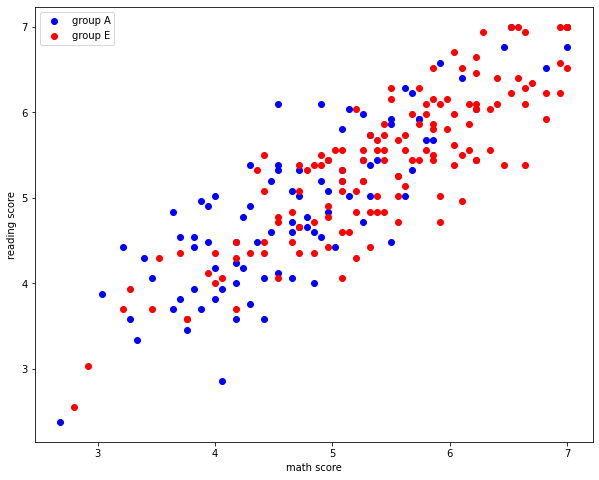

In [64]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(df_grades[df_grades["race/ethnicity"]=="group A"]['math score'], df_grades[df_grades["race/ethnicity"]=="group A"]['reading score'], 
            c='blue', label='group A')
plt.scatter(df_grades[df_grades["race/ethnicity"]=="group E"]['math score'], df_grades[df_grades["race/ethnicity"]=="group E"]['reading score'],
            c='red', label='group E')
plt.xlabel('math score')     
plt.ylabel('reading score')

plt.legend(numpoints=1)
plt.show()

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>